### Rozložení náhodných proměnných

**Klíčové pojmy**:
* náhodná proměnná
* PMF (probability mass function) / PDF (probability density function) - hustota pravděpodobnosti
* CDF (cumulative distribution function) - distribuční funkce
* kvantily
* z-skor
* uniformní (rovnoměrné) rozdělení
* binomické rozdělení
* normální rozdělení



Náhodná proměnná je taková proměnná, jejíž hodnoty byly generovány náhodným procesem. Jako náhodný proces můžeme spoustu věcí:
* náhodnost při výběru pozorování (např. náhodný výběr respondentů)
* nepřesnost měření (např. zmáčknutí stopek při měření rychlosti běhu) 
* náhodou při každém pokusu (např. směr chůze opilého člověka)

Z definice může náhodná proměnná nabývat různých hodnot (jevů). Souhrn těchto různých hodnoty nazýváme rozdělení pravděpodobnosti proměnné. Toto rozdělení nám řekne, s jakou pravděpodobností daný jevy nastane. Typ tohoto pravděpodobnostního rozložení záleží na procesu, který proměnnou vytváří i na typu proměnné. 


![](/home/schubertj/cuni/stats/cviceni/cviceni_2/schema.png)


Znalost rozdělení pravděpodobnosti proměnné je velmi užiteční věc, protože nám dokáže pomoci předpovídat hodnoty dané proměnné. Ukažme si teď příklad takového rozložení na hodu kostkou. Řekněme, že naše proměnná bude mít 100 pozorování (100 hodů kostkou).


#### Uniformní rozložení

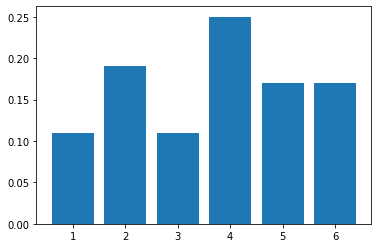

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Rectangle
np.random.seed(42)

kostka = np.arange(1,7)
n = 100
hody = np.random.choice(kostka, size=n, replace=True)
hody_rel = pd.value_counts(hody) / n

plt.bar(hody_rel.index, hody_rel)
plt.show()

Relativní četnost jednotlivých jevů (hodnot, čísel na kostce) nám řekne pravděpodobnost, s jakou daný jev nastane. Například číslo 1 padlo v našem příkladu v 10% případů. Jak si ale pamatujete ze zimního semestru, relativní četnost se pravděpodobnosti přibližuje pouze pokud počet pokusů je velmi vysoký. Co když ale nemůžeme nasbírat velký počet pozorování (pokusů)? Naštěstí existují učité skupiny rozdělení, které nám pravděpodobnosti vyjádří jako funkci. Asi bychom dovedli odhadnout, že náš výsledek uvedený nahoře neodpovídá tomu, jaké hodnoty bychom při hodu kostkou očekávali. Všechny možnosti (tedy 1,2,3,...,6) mají stejnou pravděpodobnost, že padnou. Takovému rozdělení říkáme **uniformní**. Uniformní rozdělení je generováno procesem, který předpokládá, že všechny hodnoty (jevy) proměnné budou stejně reprezentované (tedy, že budou mít stejnou pravděpodobnost realizace). Pokud proměnná $X$ pochází z uniformního rozložení, pak platí, že $X \sim U(a,b)$. Uniformní rozložení je tedy možná vyjádřit pomocí dvou parametrů $a$ a $b$, které vyjadřují minimální a maximální možné hodnoty proměnné. Funkci rozdělení pravděpodobnosti uniformního rozložení (Probability density function, nebo PDF) pro spojitou proměnnou pak můžeme vyjádřit jako: 

\begin{equation}
  f(x) =
    \begin{cases}
      \frac{1}{(b-a)} & \text{$a \le x \le b$}\\
      0 & \text{jinak}\\
    \end{cases}       
\end{equation}


A pro diskrétní proměnnou jako $f(x) = 1/N$, pokud $a \le x \le b$, jinak $f(x) = 0$. $N$ v tomto případě vyjadřuje počet možných hodnot, které $x$ může nabýt. U PDF platí, že plocha pod křivkou je rovná 1, tedy $\sum_{}f(x_i) = 1$. U spojité proměnné nelze definovat pravděpodobnost v jednom konkrétním bodě (protože má nekonečně mnoho konkrétních bodů). PDF tedy nevyjadřuje pravděpodobnost, ale hustotu pravděpodobnosti v nějakém malém intervalu (zda je tento malý interval pravděpodobnější než jiný malý interval).   


Každé takto specifikované rozdělení pravděpodobnosti má definovaný svůji očekávanou hodnotu a rozptyl. Očekávanou hodnotu uniformního rozdělení lze vypočítat jako $\frac{1}{2}(a+b)$ a jeho rozptyl jako $\frac{1}{12}(b-a)^2$

V praxi nabývá uniformního rozložení například sériová čísla při výrobě [zajímavé využití zde](https://en.wikipedia.org/wiki/German_tank_problem) nebo čekání na tramvaj. Ukažme si příklad čekání na tramvaj. Víme, že tramvaj jezdí každých 5min. My piřjdeme na zastávku, ale nevíme, kdy pojede další. Jak dlouho můžeme očekávat, že budeme čekat? Jaká je pravděpodobnost, že tramvaj přijede do 1min 30s? 

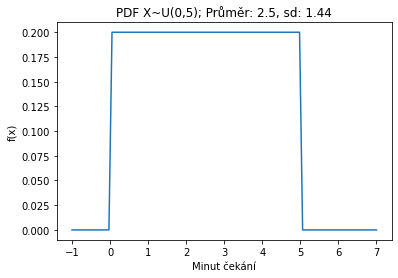

In [3]:
x = np.linspace(-1,7,num=100)

a = 0
b = 5

pdf = np.zeros(x.shape[0])
for k,v in enumerate(x):
    if (v >= a) & (v <= b):
        pdf[k] = 1/(b-a)

prumer = (a+b)/2
sd = np.round(np.sqrt((b-a)**2 / 12), 2)

plt.plot(x, pdf)
plt.xlabel("Minut čekání")
plt.ylabel("f(x)")
plt.title(f"PDF X~U(0,5); Průměr: {prumer}, sd: {sd}")
plt.show()

In [4]:
stats.uniform.pdf(x=x,loc=0,scale=5) == pdf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Protože integrál pdf se rovná 1 je plocha pod křivkou vyjádřením pravděpodobnosti, že budeme čekat déle (nebo méně), než např. 1min 30s. Tedy jaká je $p(x_i \le 1.5)$. Taková pravděpodobnost je rovna $\sum_{i=0}^{1.5} p(x_{i})$ (nebo spíše integrál, ale nebude to zbytečně komplikovat. Můžeme si to představit jako součet hodně malých intervalů :). Můžeme si ji představit jako modrou plochu pod křivkou.

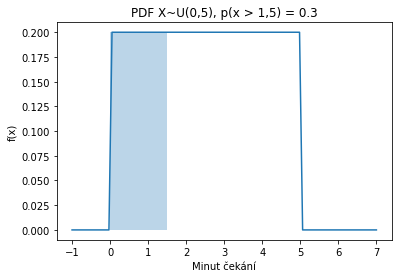

In [5]:
p_mensi_15 = stats.uniform.cdf(x=1.5, loc = 0, scale = 5)

plt.plot(x, pdf)
plt.xlabel("Minut čekání")
rect = plt.Rectangle(xy=(0, 0),width=1.5-0,height=0.2-0, alpha = 0.3, fill=True)
plt.gca().add_patch(rect)
plt.ylabel("f(x)")
plt.title(f"PDF X~U(0,5), p(x > 1,5) = {p_mensi_15}")
plt.show()

Tento výpočet si můžeme představit také tak, že jednotlivé pravděpodobnosti sečeteme kumulativně. Takto vzniklá funkce se nazává cumulative distribution function (CDF). Udává nám kumulativní pravděpodobnost, že nastane jev větší/menší než nějaké hodnota. Tedy pravděpodobnost, že nastane nějaké hodnota $x$ u náhodné proměnné $X$ by se zapsala jako $P(X \le x)$. Náš výpočet nahoře, tedy $p(x_i \le 1.5)$ zobrazíme na grafu červenou čarou.

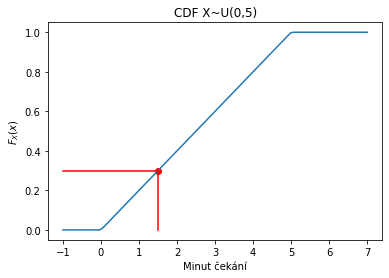

In [6]:
cdf = stats.uniform.cdf(x, loc = 0, scale = 5)

plt.plot(x, cdf)
plt.xlabel("Minut čekání")
plt.ylabel("$F_X(x)$")
plt.title(f"CDF X~U(0,5)")
plt.plot([1.5,1.5], [0, p_mensi_15], color = "red")
plt.plot([-1,1.5], [p_mensi_15, p_mensi_15], color = "red")
plt.scatter([1.5], [p_mensi_15], color = "red")
plt.show()

#### Binomické rozložení

S binomických rozložením jsme se setkali v minulém semestru, když jsme simulovali hody mincí. Jevy mohou být generovany procesem, který vede k binomickému rozložení, pokud máme pokus, jehož výsledkem je úspěch neno neúspěch, pokusy jsou nezávislé a maj9 konstantní pravděpodobnost úspěchu $p$ (konstantní pro všechny pokusy). Obecně platí, že proměnná $X$ pochází z binomického rozložení, kde $X \sim B(n, p)$. $n$ značí počet pokusů a $p$ pravděpodobnost úspěchu. Z definuce je $X$ **diskrétní**. Hustota pravděpodobnosti (PMF, neplést s PDF, které se počítá pro spojité proměnné) se počítá jako $f(x) = \binom{n}{k}p^kq^{n-k}$, kde $k$ je počet úspěchů. **Očekávaná hodnota** se počítá jako $np$ a **rozptyl** jako $np(1-p)$. Binomické rozložení je hojně používaným rozložením k simulovaní mnoha jevů, které nastávají v každodenním životě, např. počet lidí, kteří kliknou na reklamu, počet branek, které padnou z penalt apod. My si ukážeme příklad s počtem reklamací. 

Víme, že zhruba 0.5% zákazníků po zakoupení výrobku žádá do 14 dnů o reklamaci. V minulých 14 dnech naše firma udělala velkou slevovou akci a náš výrobek si zakoupilo 3000 zákazníku. Vedení firmy chce zákazníky uspokojit ihned a proto automaticky posílá nový výrobek. Dostali jste úkol vypočítat, kolik potřebujeme mít na skladě výrobků, abychom uspokojili alespoň 95% zákazníků.  

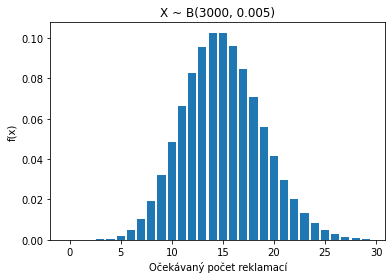

In [7]:
p_kliknuti = 0.005
n = 3000
x = np.arange(0, 30)
pmf = stats.binom.pmf(n = n, p = p_kliknuti, k = x)

plt.bar(x, height=pmf)
plt.xlabel("Očekávaný počet reklamací")
plt.title("X ~ B(3000, 0.005)")
plt.ylabel("f(x)")
plt.show()

Všimněte si, že u diskrétní proměnné (narozdíl od spojité) PMA vyjařuje očekávanou pravděpodobnost. Je to proto, že u diskrétní proměnné víme konkrétní počet a nemusíme tak řešit problém s nekonečným možným počtem hodnot $X$. Pokud chceme vypočítat $p(X \le x_i) = 0.95$. V tomto případě tedy víme výslednou pravděpodobnost, ale potřebujeme zjistit hodnotu $x_i$. Takovému požadavku odpovídá hodnota 22. Tento výpočet je zobrazen na grafu dole.  

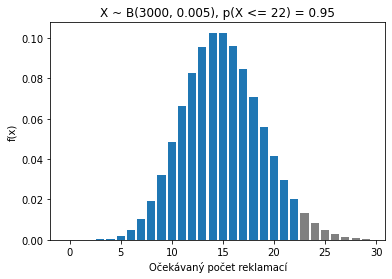

In [8]:
q_95 = stats.binom.ppf(n = n, p = p_kliknuti, q = 0.95)

for i in range(pmf.shape[0]):
    if x[i] <= q_95:
        plt.bar(x[i], height=pmf[i], color = "#1f77b4")
    else:
        plt.bar(x[i], height=pmf[i], color = "grey")
    
plt.xlabel("Očekávaný počet reklamací")
plt.title(f"X ~ B(3000, 0.005), p(X <= 22) = 0.95")
plt.ylabel("f(x)")
plt.show()

Stejně jako jsme udělali u uniformního rozložení nahoře můžeme vypočítat CDF.

#### Normální rozložení

Další rozložení, které si ukážeme je normální rozložení. Toto rozložení vzniká u spojitých proměnných při procesu, kdy není náhodná proměnná nijak ohraničená (nebo jsou její hranice daleko od průměru proměnné). Pokud náhodná proměná $X$ pochází z normálního rozložení, potom platí, že $X \sim N(\mu, \sigma)$. Její PDF se počítá jako $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$. Jak vidno je to poměrně komplikovaná funkce. **Očekávanou hodnotou** tohoto rozložení je aritmetický průměr a **rozptylem** je $\sigma^2$, který jsme počítali na minulém cvičení. Spousta spojitých proměnných v každodenním životě nabývá normálního rozložení, např. výška, váha nebo síla, kterou cyklista vydá při závodě. 

Normální rozložení je symetrické a má velmi užitečné vlastnosti. Jedním z nich je to, že podle směrodatné odchylky dokážeme určit kolik případů bychom a jak daleko bychom očekávali, že budou ležet od průměru. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png)


My si ukážeme příklad naměřené síly cyklisty. Z tréninkových dat cyklisty víme, že při hodinovém úsilí dokáže vyvinout průměrnou sílu 250W se směrodatnou odchylkou 50W. Jak dlouho můžeme čekat, že dokáže cyklista jet nad 300W při hodinovém závodě?

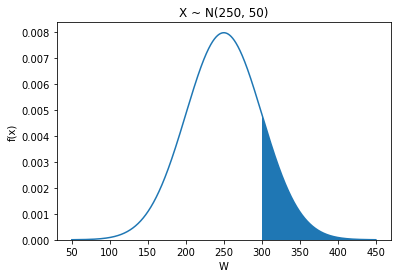

In [9]:
x = np.linspace(50,450, num=5000)
pdf = stats.norm.pdf(loc=250, scale=50, x=x)

plt.plot(x, pdf)
for i in range(pdf.shape[0]):
    if x[i] > 300:
        plt.bar(x[i],pdf[i], color = "#1f77b4")

plt.title("X ~ N(250, 50)")
plt.xlabel("W")
plt.ylabel("f(x)")
plt.show()

In [10]:
cdf = stats.norm.cdf(loc=250, scale=50, x=300)
cdf_i = np.round(1-cdf, 2)
minut = 60 * cdf_i 
print(f"Cyklista dokáže jet více než 300W po zhruba: {cdf_i} % z 1hod, tedy asi {minut} minut")

Cyklista dokáže jet více než 300W po zhruba: 0.16 % z 1hod, tedy asi 9.6 minut


Různá normální roložení můžeme také standardizovat a to tak, že jejich průměr bude vždy roven 0 a směrodatná odchylka 1. Takovému normálnímu rozložení říkáme standardizované normální rozložení. Standardizaci náhodné proměnné $X$ můžeme provésto pomocí $z = \frac{(x_i - \mu)}{\sigma_x}$

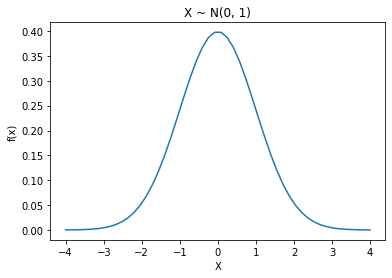

In [12]:
z = np.linspace(-4,4)
pdf_std = stats.norm.pdf(x = z)

plt.plot(z, pdf_std)
plt.title("X ~ N(0, 1)")
plt.xlabel("X")
plt.ylabel("f(x)")
plt.show()

**Kvantily** rozložení proměnné nám ji rozdělí na $k$ stejně velkých dílů a řeknou nám, v jakém bodě se nachází určité procento hodnot proměnné. Můžeme si je představit jako takové rozšíření mediánu, který nám řekl, v jakém bodě se nacházela 50% proměnné. Kvantily pro určitou hodnotu $p$ se značí jako $Q_p$. Medián se tedy dá označit jako $medián = Q_{0.5}$. Nejčastěji se používají kvartily (4 díly), kvintily (5 dílů) a decily (10 dílů).

In [26]:
q = np.linspace(0,1,num=5)
print(f"Kvantily {q} proměnné W: {np.quantile(a = x, q=q)}")

Kvantily [0.   0.25 0.5  0.75 1.  ] proměnné W: [ 50. 150. 250. 350. 450.]
